# MLDM Group Assignment
### Members: Brigitte Aznar, Daniel Kostic and Stefan Vujovic

Data explanation
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv', index_col=0)

In [28]:
def makeClass(x):
    if x==1: return "firstClass"
    elif x==2: return "secondClass"
    else: return "thirdClass"
df['pclass'] = df.pclass.apply(lambda x: makeClass(x))

# df.fare.dropna(inplace=True, how='any')
df = df[pd.notnull(df['embarked'])]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,firstClass,female,29.0000,0,0,211.3375,S
1,1,firstClass,male,0.9167,1,2,151.5500,S
2,0,firstClass,female,2.0000,1,2,151.5500,S
3,0,firstClass,male,30.0000,1,2,151.5500,S
4,0,firstClass,female,25.0000,1,2,151.5500,S


In [33]:
import matplotlib.pylab as plt
def proportion_df(discrete_val):
    by_var = df.groupby([discrete_val,'survived'])
    freq_table = by_var.size()
    freq_table = freq_table.unstack()
    freq_table = freq_table.div(freq_table.sum(1), axis=0)
    return freq_table

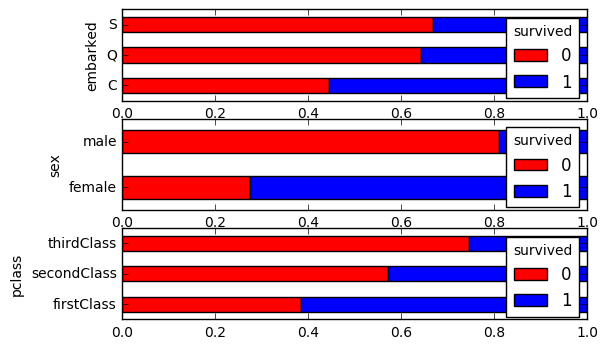

In [34]:
value_list = ['embarked','sex','pclass']
canvas, axes1 = plt.subplots(len(value_list),1)
for val in value_list:
    freq_table = proportion_df(val)
    colorsheme = ['red','blue']
    freq_table.plot(kind='barh', stacked=True, ax=axes1[value_list.index(val)], color=colorsheme)
plt.show()

Looking at these plots we can see that it is much more likely for a female to survive. Furthermore,
we can see that the passanger class has an impact on survival, the lower the class, the lower probability of survival.
The people who embark at Cherbourg have most chances of survival, much better than people from Queenstown and Southampton. 

In [35]:
by_var = df.groupby(["sex",'pclass','embarked','survived'])
freq_table = by_var.size()
freq_table = freq_table.unstack()
freq_table = freq_table.div(freq_table.sum(1), axis=0)

In [36]:
classes = ['firstClass','secondClass','thirdClass']
def plot_by_sex_and_class(df,sex,class_list):
    sex = freq_table.loc[sex]
    canvas, axes1 = plt.subplots(len(class_list),1)
    for c in class_list:
        tbl = sex.loc[c]
        colorsheme = ['red','blue']
        tbl.plot(kind='barh', stacked=True, ax=axes1[class_list.index(c)], color=colorsheme, title=str(c))
    canvas.tight_layout()   
    plt.show()

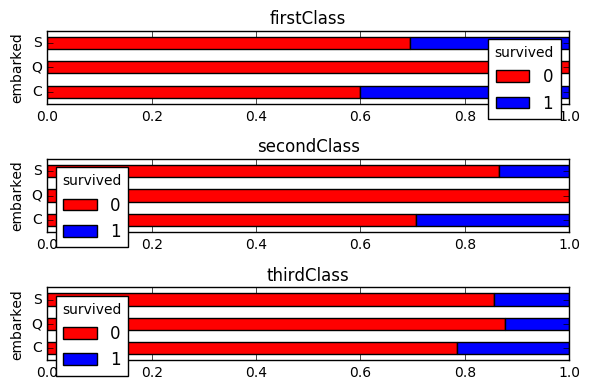

In [37]:
plot_by_sex_and_class(freq_table, 'male', classes)

Here, we can see that males who embarked in Queenstown have the best chances of survival.

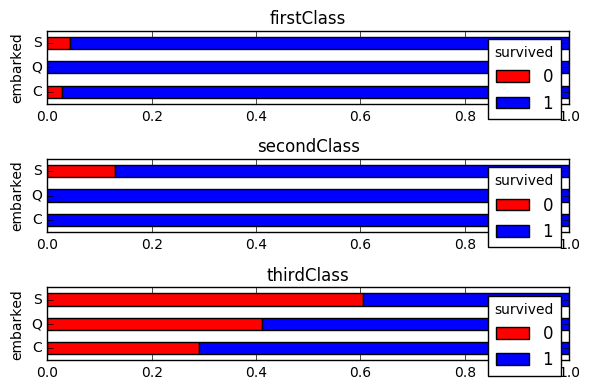

In [38]:
plot_by_sex_and_class(freq_table, 'female', classes)

In [ ]:
bins = [0,5,18, 25, 40, 60, 100]
binNames =['Young Child', 'Child', 'Young Adult', 'Adult', 'Middle Aged', 'Older']
binAge = pd.cut(df.age, bins, labels=binNames)
binAge

group = df.groupby([binAge, 'sex', 'survived'])
group = group.size().unstack()
group = group.div(group.sum(1), axis=0)
colorsheme = ['red','blue']
ax = group.plot(kind='barh', stacked=True, color=colorsheme)
plt.show()

When we look at the sex and age, we can see that the older the men are, the smaller the chances of survival are. It is vice versa for women. 

## What is the age/class of persons whose fare is 0? Are they babies/kids?

In [3]:
df[df.fare==0].age.value_counts(dropna=False)

NaN      9
 49.0    2
 25.0    1
 36.0    1
 19.0    1
 38.0    1
 40.0    1
 39.0    1
Name: age, dtype: int64

In [4]:
df[df.fare==0].age.value_counts(dropna=False)

NaN      9
 49.0    2
 25.0    1
 36.0    1
 19.0    1
 38.0    1
 40.0    1
 39.0    1
Name: age, dtype: int64

In [5]:
df[df.fare==0].age.describe()

count     8.000000
mean     36.875000
std      10.494046
min      19.000000
25%      33.250000
50%      38.500000
75%      42.250000
max      49.000000
Name: age, dtype: float64

As they are not kids, lets replace their fare with the mean.

In [6]:
df.fare = df.fare.apply(lambda x: 33 if pd.isnull(x) else x)

In [7]:
df.embarked.value_counts(dropna=False)

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [8]:
df.age.describe()
mean = 29.881135
std_dev = 14.413500
age_fillers = np.random.normal(mean, std_dev, 280)
age_fillers = [i for i in age_fillers if i>0][:263]
df['age1'] = df.age.apply(lambda x: age_fillers.pop() if np.isnan(x) else x)
# df['age1'] = df.age.apply(lambda x: mean if np.isnan(x) else x)


# df = df[pd.notnull(df['age'])]
# df['age1'] = df.age

In [9]:
cat_columns = ['pclass', 'sex', 'embarked'] # embarked
for cat_col in cat_columns:
    df = df.join(pd.get_dummies(df[cat_col]))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# from sklearn import tree
# features = ['age1', 'firstClass', 'secondClass', 'thirdClass', 'sibsp', 'parch', 'fare', 'female', 'C', 'Q', 'S'] #, 'C', 'Q', 'S'
# clf = tree.DecisionTreeClassifier(criterion='gini')
# clf = clf.fit(df[features], df['survived'])

In [12]:
# tree.export_graphviz(clf, out_file='tree.dot')

In [13]:
# for feat in features:
#     print("{}, from {}".format(df[feat].isnull().sum(), feat))

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age1,firstClass,secondClass,thirdClass,female,male,C,Q,S
0,1,firstClass,female,29.0000,0,0,211.3375,S,29.0000,1,0,0,1,0,0,0,1
1,1,firstClass,male,0.9167,1,2,151.5500,S,0.9167,1,0,0,0,1,0,0,1
2,0,firstClass,female,2.0000,1,2,151.5500,S,2.0000,1,0,0,1,0,0,0,1
3,0,firstClass,male,30.0000,1,2,151.5500,S,30.0000,1,0,0,0,1,0,0,1
4,0,firstClass,female,25.0000,1,2,151.5500,S,25.0000,1,0,0,1,0,0,0,1


In [41]:
from DecisionTree import DecisionTree as Dt
from DecisionTree import bagging, generate_trees, generate_simple_trees
from sklearn.model_selection import train_test_split
from time import time
x_train, x_test, y_train, y_test = train_test_split(df.drop('survived', 1), df['survived'], test_size=0.2)
x_train['survived']  = y_train
x_test['survived'] = y_test

features = ['sex', 'age1', 'pclass', 'fare', 'embarked', 'sibsp', 'parch']

In [42]:
now = time()

trees = generate_simple_trees(x_train, features, 'survived', 15)
print(now - time())

-347.81507182121277


In [43]:
preds = bagging(x_train, x_test, features, 'survived', 9, trees)


In [44]:
print(len(trees))
print(len(x_test))
print(len(y_test))
print(len(preds))

15
262
262
262


In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.797709923664


In [31]:
df.survived.value_counts(normalize=True)

0    0.618975
1    0.381025
Name: survived, dtype: float64

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_feat = ['age1', 'firstClass', 'secondClass', 'thirdClass', 'sibsp', 'parch', 'fare', 'female', 'C', 'Q', 'S']
clf = clf.fit(x_train[clf_feat], y_train)
clf_preds = clf.predict(x_test[clf_feat])
print(accuracy_score(y_test, clf_preds))

0.732824427481


In [33]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,age1,firstClass,secondClass,thirdClass,female,male,C,Q,S,survived
637,thirdClass,male,24.0,0,0,7.775,S,24.000000,0,0,1,0,1,0,0,1,0
1200,thirdClass,male,NaN,0,0,8.050,S,27.222690,0,0,1,0,1,0,0,1,0
1176,thirdClass,male,NaN,8,2,69.550,S,29.398208,0,0,1,0,1,0,0,1,0
579,secondClass,male,23.0,1,0,10.500,S,23.000000,0,1,0,0,1,0,0,1,0
636,thirdClass,female,18.0,1,0,17.800,S,18.000000,0,0,1,1,0,0,0,1,0


In [34]:
dt = Dt()
dt.fit(x_train[features], y_train)
predictions = dt.predict(x_test[features])
print(accuracy_score(y_test, predictions))

0.709923664122


age with random
we - 76
sk - 79
bg - 81,6

In [35]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(clf, df[clf_feat], df['survived'], cv=10)

In [36]:
scores.mean()

0.69843431791594413

In [37]:
scores

array([ 0.65648855,  0.77862595,  0.78625954,  0.74045802,  0.75572519,
        0.72519084,  0.6870229 ,  0.58778626,  0.58461538,  0.68217054])

In [38]:
from sklearn.model_selection import KFold
def cross_val(classifier, data, target, num_iter):
    accus = []
    label = target.name
    data[label] = target.values
    frac = 1 / float(num_iter)
    for i in range(0, num_iter):
        from_ix = i*frac
        to_ix = from_ix + frac
        split_ix = data.index[int(len(data)*from_ix):int(len(data)*to_ix)]
        train = data.drop(split_ix)
        test=data.drop(train.index)
        classifier.fit(train.drop(label, 1), train[label])
        predictions = classifier.predict(test.drop(label, 1))
        acc = accuracy_score(test[label], predictions)
        accus.append(acc)
    return accus

In [39]:
scoreas = cross_val(Dt(), df[features], df['survived'], 10)

In [40]:
np.mean(scoreas)

0.72003523194362873